<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-2-b3fdaf15785b>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


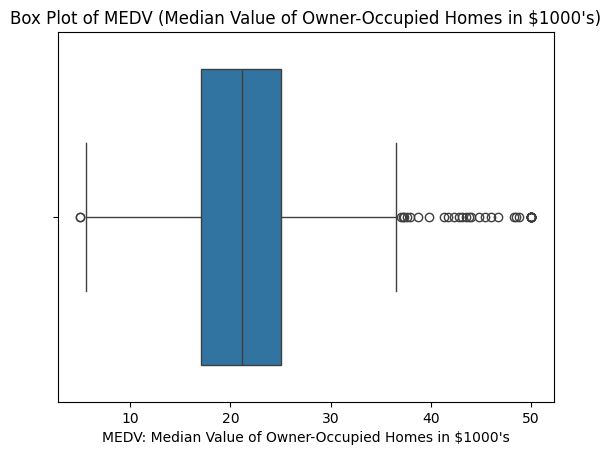

In [7]:
ax = sns.boxplot(x='MEDV', data=boston_df)
pyplot.title('Box Plot of MEDV (Median Value of Owner-Occupied Homes in $1000\'s)')
pyplot.xlabel('MEDV: Median Value of Owner-Occupied Homes in $1000\'s')
pyplot.show()

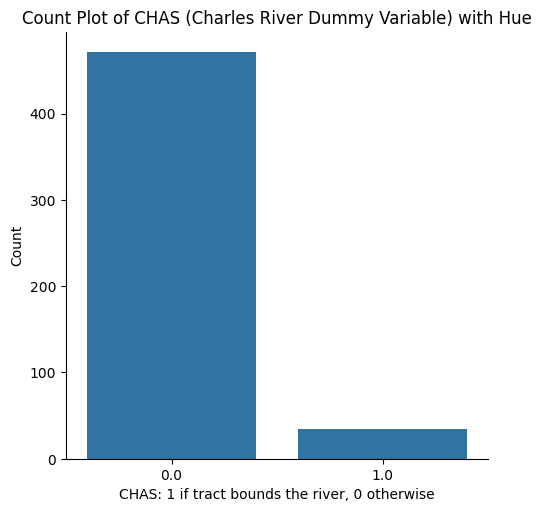

In [20]:
# Create a categorical plot (catplot) for the 'chas' variable using 'hue' to differentiate the colors
sns.catplot(x='CHAS', kind='count', data=boston_df)
# Set the title and labels for the axes using pyplot
pyplot.title('Count Plot of CHAS (Charles River Dummy Variable) with Hue')
pyplot.xlabel('CHAS: 1 if tract bounds the river, 0 otherwise')
pyplot.ylabel('Count')

# Show the plot
pyplot.show()

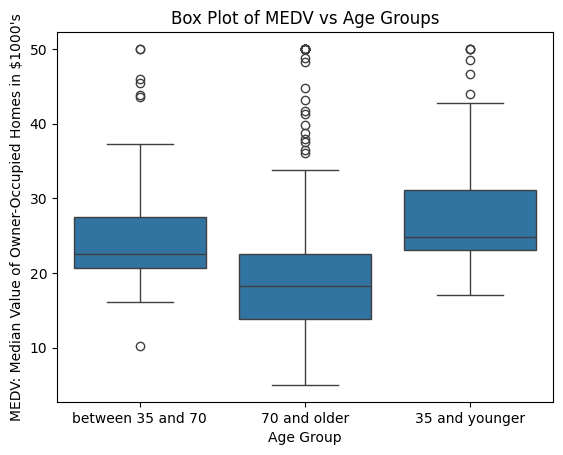

In [47]:
boston_df.loc[(boston_df['AGE']<=35), 'age group'] == '35 and younger'
boston_df.loc[(boston_df['AGE']>35)&(boston_df['AGE']<70), 'age group'] == 'between 35 and 70'
boston_df.loc[(boston_df['AGE']>=70), 'age group'] == '70 and older'
ax = sns.boxplot(x='age group', y='MEDV', data=boston_df)

# Set the title and labels using pyplot
pyplot.title('Box Plot of MEDV vs Age Groups')
pyplot.xlabel('Age Group')
pyplot.ylabel('MEDV: Median Value of Owner-Occupied Homes in $1000\'s')

# Show the plot
pyplot.show()

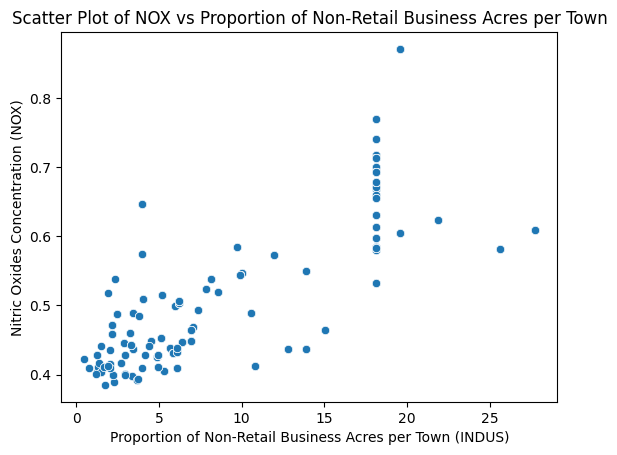

In [28]:
ax = sns.scatterplot(x='INDUS', y='NOX', data=boston_df)

# Set the title and labels using pyplot
pyplot.title('Scatter Plot of NOX vs Proportion of Non-Retail Business Acres per Town')
pyplot.xlabel('Proportion of Non-Retail Business Acres per Town (INDUS)')
pyplot.ylabel('Nitric Oxides Concentration (NOX)')

# Show the plot
pyplot.show()

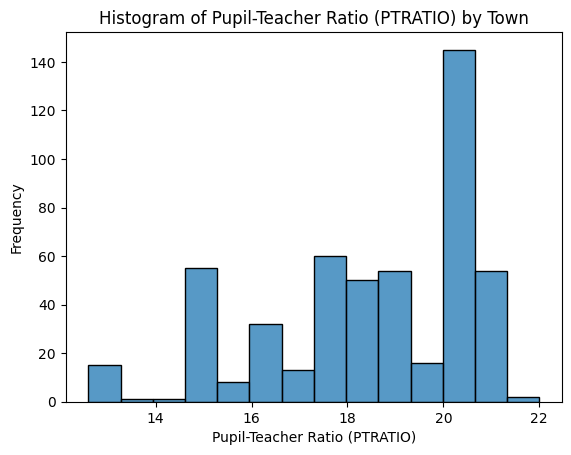

In [33]:
ax = sns.histplot(boston_df['PTRATIO'])

# Set the title and labels using pyplot
pyplot.title('Histogram of Pupil-Teacher Ratio (PTRATIO) by Town')
pyplot.xlabel('Pupil-Teacher Ratio (PTRATIO)')
pyplot.ylabel('Frequency')

# Show the plot
pyplot.show()


In [45]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                  boston_df[boston_df['CHAS'] == 0]['MEDV'], equal_var = True)


TtestResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

In [50]:
thirtyfive_lower = boston_df[boston_df['age group'] == '35 and younger']['MEDV']
thirtyfive_seventy= boston_df[boston_df['age group']== 'between 35 and 70']['MEDV']
seventy_older= boston_df[boston_df['age group']== '70 and older']['MEDV']
f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_lower, thirtyfive_seventy , seventy_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


In [52]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

In [54]:
## X is the input variables (or independent variables)
X = boston_df['DIS']
## y is the target/dependent variable
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sun, 29 Dec 2024   Prob (F-statistic):           1.21e-08
Time:                        13:04:17   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""